<a href="https://www.kaggle.com/chirayupurohit/chirayu-101903011?scriptVersionId=90264652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import cudf as pd
import cupy as np

In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
test.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        3263 non-null   int64
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB


In [4]:
train.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        7613 non-null   int64
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
train.head(20)

,id,keyword,location,text,target
0,1,<NA>,<NA>,Our Deeds are the Reason of this #earthquake M...,1
1,4,<NA>,<NA>,Forest fire near La Ronge Sask. Canada,1
2,5,<NA>,<NA>,All residents asked to 'shelter in place' are ...,1
3,6,<NA>,<NA>,"13,000 people receive #wildfires evacuation or...",1
4,7,<NA>,<NA>,Just got sent this photo from Ruby #Alaska as ...,1
5,8,<NA>,<NA>,#RockyFire Update => California Hwy. 20 closed...,1
6,10,<NA>,<NA>,#flood #disaster Heavy rain causes flash flood...,1
7,13,<NA>,<NA>,I'm on top of the hill and I can see a fire in...,1
8,14,<NA>,<NA>,There's an emergency evacuation happening now ...,1
9,15,<NA>,<NA>,I'm afraid that the tornado is coming to our a...,1


In [6]:
test.head(20)

,id,keyword,location,text
0,0,<NA>,<NA>,Just happened a terrible car crash
1,2,<NA>,<NA>,"Heard about #earthquake is different cities, s..."
2,3,<NA>,<NA>,"there is a forest fire at spot pond, geese are..."
3,9,<NA>,<NA>,Apocalypse lighting. #Spokane #wildfires
4,11,<NA>,<NA>,Typhoon Soudelor kills 28 in China and Taiwan
5,12,<NA>,<NA>,We're shaking...It's an earthquake
6,21,<NA>,<NA>,They'd probably still show more life than Arse...
7,22,<NA>,<NA>,Hey! How are you?
8,27,<NA>,<NA>,What a nice hat?
9,29,<NA>,<NA>,Fuck off!


In [7]:
test.keyword.unique()

0                     <NA>
1                   ablaze
2                 accident
3               aftershock
4      airplane%20accident
              ...         
217                wounded
218                 wounds
219                  wreck
220               wreckage
221                wrecked
Name: keyword, Length: 222, dtype: object

In [8]:
train.keyword.unique()

0                     <NA>
1                   ablaze
2                 accident
3               aftershock
4      airplane%20accident
              ...         
217                wounded
218                 wounds
219                  wreck
220               wreckage
221                wrecked
Name: keyword, Length: 222, dtype: object

In [9]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

Data Cleaning


In [10]:
#Removing URLS
def url_clean(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [11]:
#Removing HTML tags
def html_clean(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [12]:
#Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [13]:
# lower case
def to_lower(text):
    return text.lower()

In [14]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [15]:
# remove stopwords
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([x for x in nltk.word_tokenize(sentence) if not x in stop_words])

In [16]:
# remove whitespace
def to_strip(text):
    return " ".join(text.split())

In [17]:
# remove Punctuation
from string import punctuation
def remove_punct(text):
    return ''.join(x for x in text if x not in punctuation)

In [18]:
# Contraction
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
    "how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
    "mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
    "there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
    "where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [19]:
#applying functions on texts
train['text'] = train['text'].to_pandas().apply(lambda x: url_clean(x))
train['text']= train['text'].to_pandas().apply(lambda x : html_clean(x))
train['text']= train['text'].to_pandas().apply(lambda x : remove_emoji(x))
train['text']= train['text'].to_pandas().apply(lambda x :to_lower(x))
train['text']= train['text'].to_pandas().apply(lambda x : main_contraction(x))
train['text']= train['text'].to_pandas().apply(lambda x : remove_punct(x))
train['text']= train['text'].to_pandas().apply(lambda x : to_strip(x))
train['text']= train['text'].to_pandas().apply(lambda x : remove_stopwords(x))
train['text'] = train['text'].to_pandas().apply(lemmatize)
train['text'].head(5)

0           deed reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
3    13000 people receive wildfire evacuation order...
4    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

In [20]:
test['text']= test['text'].to_pandas().apply(lambda x : url_clean(x))
test['text']= test['text'].to_pandas().apply(lambda x : html_clean(x))
test['text']= test['text'].to_pandas().apply(lambda x : remove_emoji(x))
test['text']= test['text'].to_pandas().apply(lambda x :to_lower(x))
test['text']= test['text'].to_pandas().apply(lambda x : main_contraction(x))
test['text']= test['text'].to_pandas().apply(lambda x : remove_punct(x))
test['text']= test['text'].to_pandas().apply(lambda x : to_strip(x))
test['text']= test['text'].to_pandas().apply(lambda x : remove_stopwords(x))
test['text'] =test['text'].to_pandas().apply(lemmatize)

Exploring the texts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

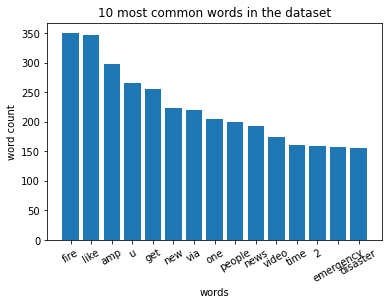

In [21]:
# Word Frequency
from collections import Counter
def count_df(df):
    '''Return the count of values in dataset'''
    counter = Counter()
    for text in df.to_pandas():
        for word in text.split():
            counter[word] +=1
#     print(type(counter))
    return counter
import matplotlib.pyplot as plt
import seaborn as sns
most_common_words = count_df(train["text"]).most_common(15) 
most_common_words, corresponding_values = zip(*most_common_words)
plt.bar(most_common_words, corresponding_values)
plt.title("10 most common words in the dataset")
plt.xlabel("words")
plt.ylabel("word count")
plt.xticks(rotation= 30)

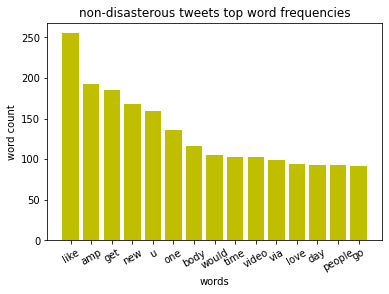

In [22]:
#seeing the frequency
non_disastrous_words = count_df(train.loc[train['target'] == 0]["text"]).most_common(15)
most_non_disastrous_words, most_non_disastrous_words_values = zip(*non_disastrous_words)
plt.bar(most_non_disastrous_words, most_non_disastrous_words_values, color='y')
plt.title("non-disasterous tweets top word frequencies")
plt.xlabel("words")
plt.ylabel("word count")
plt.xticks(rotation= 30)
plt.show()

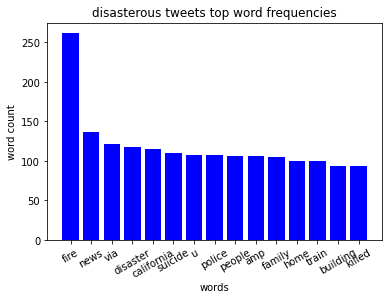

In [23]:
disastrous_words = count_df(train.loc[train['target'] == 1]["text"]).most_common(15)
most_disastrous_words, most_disastrous_words_values = zip(*disastrous_words)
plt.bar(most_disastrous_words, most_disastrous_words_values, color='b')
plt.title("disasterous tweets top word frequencies")
plt.xlabel("words")
plt.ylabel("word count")
plt.xticks(rotation= 30)
plt.show()

Selecting some of the models 

In [24]:
from cuml.feature_extraction.text import CountVectorizer
from cuml.model_selection import train_test_split
from cuml.ensemble import RandomForestClassifier
from cuml.linear_model import LogisticRegression
from cuml.svm import SVC
from cuml.neighbors import KNeighborsClassifier


In [25]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train["text"])
test_vectors = count_vectorizer.transform(test["text"])
train_vectors = train_vectors.toarray()
test_vectors = test_vectors.toarray()

Selecting an appropriate model

In [26]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

models = [knn,logreg, rf,svm]
model_names = ['KNN','Logistic Regression', 'Random Forest', 'SVM']



In [27]:
train_targets =  train["target"].values
train, val, train_labels, val_labels = train_test_split(train_vectors, train_targets, test_size= 0.1, stratify= train_targets, random_state= 42)
                                                        

In [28]:
from sklearn.metrics import classification_report
for model, model_name in zip(models, model_names):
    model_instance = model
    model_instance.fit(train, train_labels) # Fitting models 
    print(f'For {model_name}:')
    pred = model_instance.predict(val) # Predictions on validation set
    print(classification_report(val_labels.get(), pred.get()))

For KNN:
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       434
           1       0.88      0.25      0.39       327

    accuracy                           0.66       761
   macro avg       0.76      0.61      0.58       761
weighted avg       0.74      0.66      0.61       761

For Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       434
           1       0.80      0.71      0.75       327

    accuracy                           0.80       761
   macro avg       0.80      0.79      0.79       761
weighted avg       0.80      0.80      0.80       761

For Random Forest:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       434
           1       0.99      0.20      0.34       327

    accuracy                           0.66       761
   macro avg       0.80      0.60      0.55       761
weighted avg       0.

We can clearly see that SVM and Logistic Regression are having maximum accuracy

Now we can import accuracy score and check the accurancy score individually to get to a better result

In [29]:
from cuml.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_vectors, train_targets)
print('Accuracy of Logistic Regression: ')
print(np.round(accuracy_score(train_targets, lr.predict(train_vectors)) * 100, 2))

Accuracy of Logistic Regression: 
95.56


In [30]:
svm = SVC()
svm.fit(train_vectors, train_targets)
print('Accuracy of SVM: ')
print(np.round(accuracy_score(train_targets, svm.predict(train_vectors)) * 100, 2))

Accuracy of SVM: 
94.6


We can now say that Logistic Regresion is giving better accuracy

In [31]:
predictions = lr.predict(test_vectors)
submission_file = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission_file['target'] = predictions
submission_file.to_csv("submission.csv", index= False)